In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
bank_data = pd.read_csv('bank.csv')

In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
bank_data.shape

(11162, 17)

In [6]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
bank_data.replace({"deposit":{'no':0,'yes':1}},inplace=True)

In [9]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [10]:
bank_data['duration'].value_counts()

duration
97      39
161     38
158     37
119     37
150     37
        ..
915      1
2029     1
1499     1
1399     1
1812     1
Name: count, Length: 1428, dtype: int64

<Axes: xlabel='education', ylabel='count'>

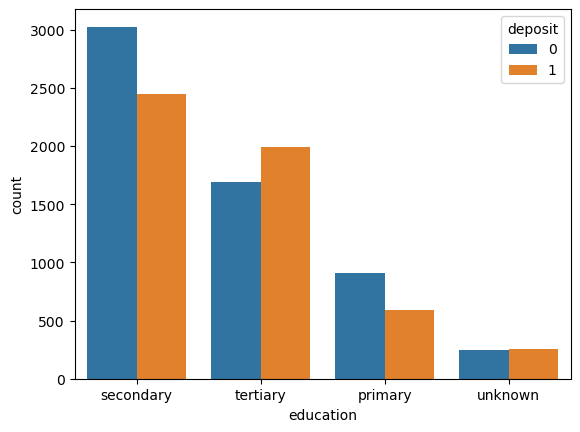

In [11]:
sns.countplot(x='education',hue='deposit',data=bank_data)

In [12]:
bank_data.replace({"education":{'secondary':0,'tertiary':1,'primary':2,'unknown':3}},inplace=True)

<Axes: xlabel='marital', ylabel='count'>

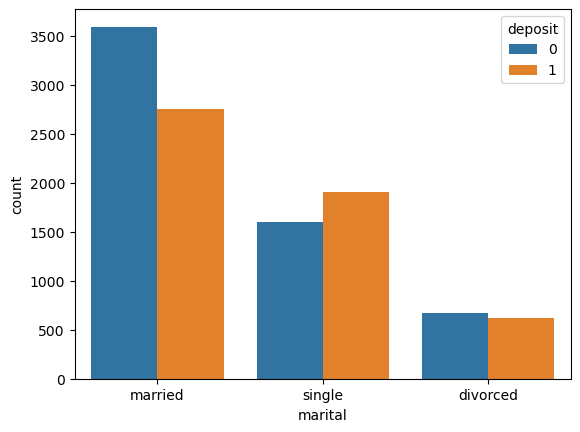

In [13]:
sns.countplot(x='marital',hue='deposit',data=bank_data)

In [14]:
bank_data.replace({"marital":{'married':0,'single':1,'divorced':2}},inplace=True)

<Axes: xlabel='job', ylabel='count'>

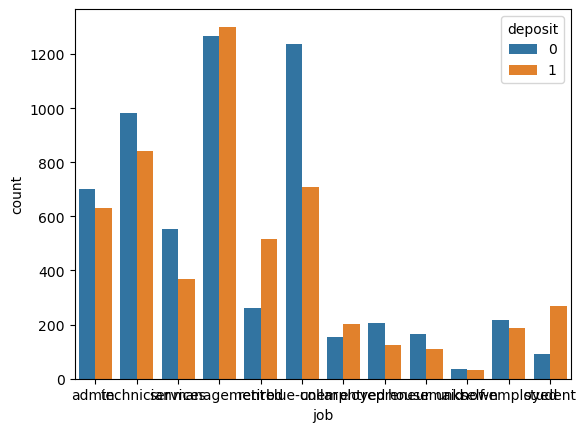

In [15]:
sns.countplot(x='job',hue='deposit',data=bank_data)

In [16]:
bank_data['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [17]:
bank_data.replace({"job":{'management':0,'blue-collar':1,'technician':2,'admin.':3,'services':4,'retired':5,'self-employed':6,
                         'student':7,'unemployed':8,'entrepreneur':9,'housemaid':10,'unknown':11}},inplace=True)

In [18]:
bank_data['default'].value_counts()

default
no     10994
yes      168
Name: count, dtype: int64

In [19]:
bank_data.replace({"default":{'no':0,'yes':1}},inplace=True)

In [20]:
bank_data['housing'].value_counts()

housing
no     5881
yes    5281
Name: count, dtype: int64

In [21]:
bank_data['loan'].value_counts()

loan
no     9702
yes    1460
Name: count, dtype: int64

In [22]:
bank_data.replace({"loan":{'no':0,'yes':1}},inplace=True)

In [23]:
bank_data['contact'].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [24]:
bank_data.replace({"contact":{'cellular':0,'unknown':1,'telephone':2}},inplace=True)

In [25]:
bank_data['month'].value_counts()

month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64

In [26]:
bank_data.replace({"month":{'may':0,'jun':1,'jul':2,'aug':3,'sep':4,'oct':5,'nov':6,
                           'dec':7,'jan':8,'feb':9,'mar':10,'apr':11}},inplace=True)

In [27]:
bank_data['pdays'].value_counts()

pdays
-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: count, Length: 472, dtype: int64

In [28]:
bank_data['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [29]:
bank_data.replace({"housing":{'yes':0,'no':1,}},inplace=True)

In [30]:
bank_data.replace({"poutcome":{'unknown':0,'failure':1,'success':2,'other':3}},inplace=True)

In [31]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,3,0,0,0,2343,0,0,1,5,0,1042,1,-1,0,0,1
1,56,3,0,0,0,45,1,0,1,5,0,1467,1,-1,0,0,1
2,41,2,0,0,0,1270,0,0,1,5,0,1389,1,-1,0,0,1
3,55,4,0,0,0,2476,0,0,1,5,0,579,1,-1,0,0,1
4,54,3,0,1,0,184,1,0,1,5,0,673,2,-1,0,0,1


In [32]:
bank_data.drop(columns=['month','pdays'],axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,previous,poutcome,deposit
0,59,3,0,0,0,2343,0,0,1,5,1042,1,0,0,1
1,56,3,0,0,0,45,1,0,1,5,1467,1,0,0,1
2,41,2,0,0,0,1270,0,0,1,5,1389,1,0,0,1
3,55,4,0,0,0,2476,0,0,1,5,579,1,0,0,1
4,54,3,0,1,0,184,1,0,1,5,673,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,1,2,0,1,0,0,0,20,257,1,0,0,0
11158,39,4,0,0,0,733,1,0,1,16,83,4,0,0,0
11159,32,2,1,0,0,29,1,0,0,19,156,2,0,0,0
11160,43,2,0,0,0,0,1,1,0,8,9,2,5,1,0


In [33]:
X = bank_data.drop('deposit',axis=1)
Y = bank_data['deposit']

In [34]:
print(X)
print(Y)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       59    3        0          0        0     2343        0     0        1   
1       56    3        0          0        0       45        1     0        1   
2       41    2        0          0        0     1270        0     0        1   
3       55    4        0          0        0     2476        0     0        1   
4       54    3        0          1        0      184        1     0        1   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157   33    1        1          2        0        1        0     0        0   
11158   39    4        0          0        0      733        1     0        1   
11159   32    2        1          0        0       29        1     0        0   
11160   43    2        0          0        0        0        1     1        0   
11161   34    2        0          0        0        0        1     0        0   

       day  month  duration

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [36]:
print(Y.shape, Y_train.shape, Y_test.shape)

(11162,) (8929,) (2233,)


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model = RandomForestClassifier()

In [39]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [40]:
X_test_prediction = model.predict(X_test)

data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [41]:
print('Accuracy:', data_accuracy)

Accuracy: 0.8544558889386475
